In [64]:
import tensorflow as tf
import tensorflow_probability as tfp
import sys
sys.path.append('../Utility_Scripts/')
import matplotlib.pyplot as plt
from synthetic_data_generator import MLR,meal_income,two_feature_uncertainty
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

# include this https://blog.tensorflow.org/2019/03/regression-with-probabilistic-layers-in.html
import numpy as np

try:
    plt.style.use('rossidata')
except:
    sns.set_style("white")
    

# Reviewing basic Meal Uncertainty ： meals and income

In [2]:
meal_income_dict=meal_income(size=1000)
x_values=meal_income_dict['X']
y_values=meal_income_dict['y']
X_dataset, X_holdout, y_dataset, y_holdout = train_test_split(x_values, y_values, test_size=0.1,random_state=88)


In [3]:
tfd = tfp.distributions

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1 + 1),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.05 * t[..., 1:]))),
])
negloglik = lambda y, p_y: -p_y.log_prob(y)
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05), loss=negloglik)

model.fit(x_values, y_values, epochs=500, verbose=False)


In [4]:
yhat = model(x_values)


In [5]:
yhat = model(x_values)
mean = yhat.mean()
stddev = yhat.stddev()
mean_plus_2_stddev = mean - stddev
mean_minus_2_stddev = mean + stddev

Text(0.5, 1.0, 'TF modeal predictions for \n mean and Standard Deviation')

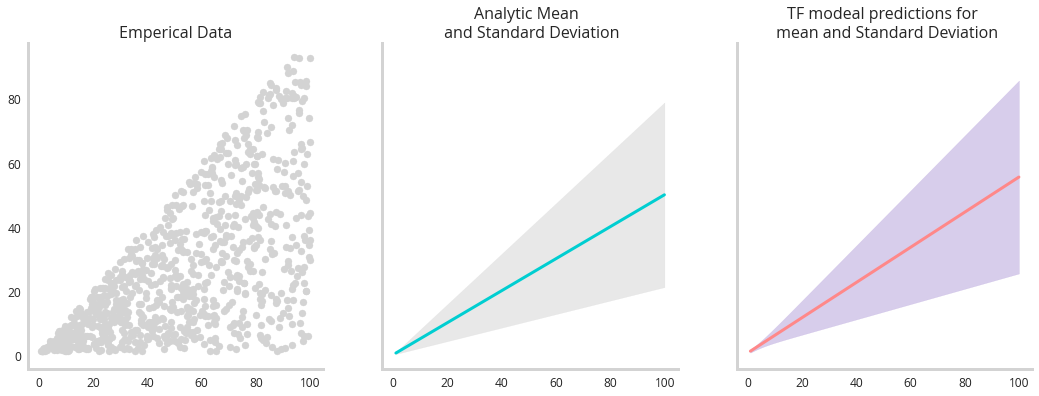

In [6]:
fig,ax=plt.subplots(1,3,figsize=(18,6),sharex=True,sharey=True)
ax[0].scatter(X_dataset.ravel(),y_dataset.ravel(),color='#d3d3d3')



mu=meal_income_dict['mu']
sigma=meal_income_dict['sigma']

ax[1].plot(x_values.ravel(), mu,linewidth=3,color='darkturquoise')
ax[1].fill_between(x_values.ravel(), mu - sigma, mu + sigma, alpha=0.5,color='#d3d3d3')
ax[2].plot(x_values.ravel(), mean.numpy().ravel(),linewidth=3,color='#FF8889')
ax[2].fill_between(x_values.ravel(), mean_minus_2_stddev.numpy().ravel(),mean_plus_2_stddev.numpy().ravel(), alpha=0.5,color='#b19cd9')

ax[0].set_title('Emperical Data')
ax[1].set_title('Analytic Mean  \n and Standard Deviation')
ax[2].set_title('TF modeal predictions for \n mean and Standard Deviation')











# Two Feature Training

In [128]:
two_feat_df=two_feature_uncertainty(size=10000)

In [129]:
X=two_feat_df[['X0','X1']].values
y=two_feat_df[['y']].values


In [130]:
def build_multiple_regression_NN(X,y):
    X_shape=X.shape

    model = Sequential()
    
    model.add(Dense(256, input_shape=(X_shape[1],), activation='relu', name='dense_1'))
    model.add(Dense(128, activation='relu', name='dense_2'))

    model.add(Dense(64, activation='relu', name='dense_3'))
    model.add(Dense(2,name='final_dense'))


    model.add(tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.05 * t[..., 1:]))),)


    negloglik = lambda y, p_y: -p_y.log_prob(y)
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05),loss=negloglik)

    return model

In [131]:
multiple_regression=build_multiple_regression_NN(X, y)

In [132]:
multiple_regression.fit(X,  y, epochs=1000, verbose=True,validation_split=0.20)

Epoch 1/1000
250/250 [==============================] - 1s 2ms/step - loss: 56.8242 - val_loss: 6.5565
Epoch 2/1000
250/250 [==============================] - 0s 1ms/step - loss: 12433374.4494 - val_loss: 12.5470
Epoch 3/1000
250/250 [==============================] - 0s 1ms/step - loss: 11.9561 - val_loss: 12.1384
Epoch 4/1000
250/250 [==============================] - 0s 2ms/step - loss: 11.4910 - val_loss: 11.2342
Epoch 5/1000
250/250 [==============================] - 0s 1ms/step - loss: 10.9883 - val_loss: 11.0218
Epoch 6/1000
250/250 [==============================] - 0s 1ms/step - loss: 14.2231 - val_loss: 12.4329
Epoch 7/1000
250/250 [==============================] - 0s 1ms/step - loss: 11.8394 - val_loss: 12.0347
Epoch 8/1000
250/250 [==============================] - 0s 1ms/step - loss: 11.4009 - val_loss: 11.1004
Epoch 9/1000
250/250 [==============================] - 0s 1ms/step - loss: 13.1594 - val_loss: 11.6239
Epoch 10/1000
250/250 [==============================] - 0s

Epoch 79/1000
250/250 [==============================] - 0s 1ms/step - loss: 10.0853 - val_loss: 10.5545
Epoch 80/1000
250/250 [==============================] - 0s 1ms/step - loss: 10.0462 - val_loss: 10.5076
Epoch 81/1000
250/250 [==============================] - 0s 1ms/step - loss: 9.9989 - val_loss: 10.4567
Epoch 82/1000
250/250 [==============================] - 0s 1ms/step - loss: 9.9371 - val_loss: 10.4022
Epoch 83/1000
250/250 [==============================] - 0s 1ms/step - loss: 9.8901 - val_loss: 10.3464
Epoch 84/1000
250/250 [==============================] - 0s 1ms/step - loss: 9.8399 - val_loss: 10.2961
Epoch 85/1000
250/250 [==============================] - 0s 1ms/step - loss: 9.7844 - val_loss: 10.2438
Epoch 86/1000
250/250 [==============================] - 0s 1ms/step - loss: 9.7318 - val_loss: 10.1894
Epoch 87/1000
250/250 [==============================] - 0s 1ms/step - loss: 9.6779 - val_loss: 10.1327
Epoch 88/1000
250/250 [==============================] - 0s 1m

250/250 [==============================] - 0s 861us/step - loss: 5.2918 - val_loss: 12.1441
Epoch 157/1000
250/250 [==============================] - 0s 852us/step - loss: 5.1973 - val_loss: 11.6886
Epoch 158/1000
250/250 [==============================] - 0s 865us/step - loss: 5.1223 - val_loss: 11.4175
Epoch 159/1000
250/250 [==============================] - 0s 851us/step - loss: 5.0814 - val_loss: 11.0290
Epoch 160/1000
250/250 [==============================] - 0s 860us/step - loss: 5.0578 - val_loss: 10.6697
Epoch 161/1000
250/250 [==============================] - 0s 876us/step - loss: 5.0025 - val_loss: 10.4170
Epoch 162/1000
250/250 [==============================] - 0s 854us/step - loss: 4.9516 - val_loss: 10.1006
Epoch 163/1000
250/250 [==============================] - 0s 997us/step - loss: 4.9220 - val_loss: 9.8702
Epoch 164/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.8819 - val_loss: 9.6266
Epoch 165/1000
250/250 [==============================] 

250/250 [==============================] - 0s 1ms/step - loss: 4.5529 - val_loss: 6.4406
Epoch 235/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5375 - val_loss: 6.4488
Epoch 236/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5505 - val_loss: 6.4358
Epoch 237/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5575 - val_loss: 6.4407
Epoch 238/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5599 - val_loss: 6.4124
Epoch 239/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5581 - val_loss: 6.4307
Epoch 240/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5535 - val_loss: 6.4389
Epoch 241/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5503 - val_loss: 6.4430
Epoch 242/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5430 - val_loss: 6.4157
Epoch 243/1000
250/250 [==============================] - 0s 1ms/step - loss: 4

250/250 [==============================] - 0s 1ms/step - loss: 4.5424 - val_loss: 6.4315
Epoch 313/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5480 - val_loss: 6.4670
Epoch 314/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5462 - val_loss: 6.4151
Epoch 315/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5473 - val_loss: 6.4485
Epoch 316/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5562 - val_loss: 6.4314
Epoch 317/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5474 - val_loss: 6.4000
Epoch 318/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5475 - val_loss: 6.4277
Epoch 319/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5403 - val_loss: 6.4245
Epoch 320/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5525 - val_loss: 6.4292
Epoch 321/1000
250/250 [==============================] - 0s 1ms/step - loss: 4

Epoch 391/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5472 - val_loss: 6.3996
Epoch 392/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5486 - val_loss: 6.4397
Epoch 393/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5478 - val_loss: 6.4099
Epoch 394/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5544 - val_loss: 6.4164
Epoch 395/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5416 - val_loss: 6.4286
Epoch 396/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5538 - val_loss: 6.4462
Epoch 397/1000
250/250 [==============================] - 0s 2ms/step - loss: 4.5528 - val_loss: 6.4252
Epoch 398/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5456 - val_loss: 6.4637
Epoch 399/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5495 - val_loss: 6.4551
Epoch 400/1000
250/250 [==============================] - 0s 1ms

250/250 [==============================] - 0s 1ms/step - loss: 4.5429 - val_loss: 6.4406
Epoch 470/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5513 - val_loss: 6.4530
Epoch 471/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5376 - val_loss: 6.4456
Epoch 472/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5457 - val_loss: 6.4387
Epoch 473/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5457 - val_loss: 6.4218
Epoch 474/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5504 - val_loss: 6.4292
Epoch 475/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5546 - val_loss: 6.4508
Epoch 476/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5523 - val_loss: 6.4292
Epoch 477/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5519 - val_loss: 6.4206
Epoch 478/1000
250/250 [==============================] - 0s 1ms/step - loss: 4

250/250 [==============================] - 0s 1ms/step - loss: 4.5570 - val_loss: 6.4541
Epoch 548/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5479 - val_loss: 6.4115
Epoch 549/1000
250/250 [==============================] - 0s 991us/step - loss: 4.5546 - val_loss: 6.4624
Epoch 550/1000
250/250 [==============================] - 0s 989us/step - loss: 4.5389 - val_loss: 6.4269
Epoch 551/1000
250/250 [==============================] - 0s 988us/step - loss: 4.5472 - val_loss: 6.4311
Epoch 552/1000
250/250 [==============================] - 0s 988us/step - loss: 4.5473 - val_loss: 6.4481
Epoch 553/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5476 - val_loss: 6.4261
Epoch 554/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5465 - val_loss: 6.3962
Epoch 555/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5573 - val_loss: 6.4351
Epoch 556/1000
250/250 [==============================] - 0s 1ms/step -

Epoch 626/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5452 - val_loss: 6.4259
Epoch 627/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5453 - val_loss: 6.4320
Epoch 628/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5512 - val_loss: 6.4093
Epoch 629/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5502 - val_loss: 6.4288
Epoch 630/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5539 - val_loss: 6.4241
Epoch 631/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5468 - val_loss: 6.4392
Epoch 632/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5502 - val_loss: 6.4119
Epoch 633/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5546 - val_loss: 6.4319
Epoch 634/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5411 - val_loss: 6.4409
Epoch 635/1000
250/250 [==============================] - 0s 1ms

250/250 [==============================] - 0s 1ms/step - loss: 4.5538 - val_loss: 6.4170
Epoch 705/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5491 - val_loss: 6.3834
Epoch 706/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5457 - val_loss: 6.4242
Epoch 707/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5490 - val_loss: 6.4424
Epoch 708/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5442 - val_loss: 6.4237
Epoch 709/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5471 - val_loss: 6.4093
Epoch 710/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5539 - val_loss: 6.4479
Epoch 711/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5507 - val_loss: 6.4035
Epoch 712/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5477 - val_loss: 6.4270
Epoch 713/1000
250/250 [==============================] - 0s 1ms/step - loss: 4

Epoch 783/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5465 - val_loss: 6.4283
Epoch 784/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5509 - val_loss: 6.4514
Epoch 785/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5429 - val_loss: 6.4376
Epoch 786/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5480 - val_loss: 6.4466
Epoch 787/1000
250/250 [==============================] - 0s 2ms/step - loss: 4.5452 - val_loss: 6.4291
Epoch 788/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5554 - val_loss: 6.4052
Epoch 789/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5529 - val_loss: 6.4523
Epoch 790/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5443 - val_loss: 6.4216
Epoch 791/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5501 - val_loss: 6.4611
Epoch 792/1000
250/250 [==============================] - 0s 1ms

250/250 [==============================] - 0s 1ms/step - loss: 4.5597 - val_loss: 6.4400
Epoch 862/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5528 - val_loss: 6.4421
Epoch 863/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5535 - val_loss: 6.4230
Epoch 864/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5532 - val_loss: 6.4490
Epoch 865/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5422 - val_loss: 6.4252
Epoch 866/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5432 - val_loss: 6.4202
Epoch 867/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5504 - val_loss: 6.4159
Epoch 868/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5456 - val_loss: 6.4158
Epoch 869/1000
250/250 [==============================] - 0s 1ms/step - loss: 4.5471 - val_loss: 6.4605
Epoch 870/1000
250/250 [==============================] - 0s 1ms/step - loss: 4

Epoch 940/1000
250/250 [==============================] - 0s 835us/step - loss: 4.5528 - val_loss: 6.4489
Epoch 941/1000
250/250 [==============================] - 0s 835us/step - loss: 4.5534 - val_loss: 6.4168
Epoch 942/1000
250/250 [==============================] - 0s 840us/step - loss: 4.5543 - val_loss: 6.4173
Epoch 943/1000
250/250 [==============================] - 0s 825us/step - loss: 4.5425 - val_loss: 6.4457
Epoch 944/1000
250/250 [==============================] - 0s 840us/step - loss: 4.5492 - val_loss: 6.4457
Epoch 945/1000
250/250 [==============================] - 0s 828us/step - loss: 4.5445 - val_loss: 6.4579
Epoch 946/1000
250/250 [==============================] - 0s 831us/step - loss: 4.5472 - val_loss: 6.4295
Epoch 947/1000
250/250 [==============================] - 0s 832us/step - loss: 4.5526 - val_loss: 6.4262
Epoch 948/1000
250/250 [==============================] - 0s 835us/step - loss: 4.5501 - val_loss: 6.4321
Epoch 949/1000
250/250 [======================

In [133]:
yhat = multiple_regression(X)
mean = yhat.mean()
stddev = yhat.stddev()
mean_plus_2_stddev = mean - stddev
mean_minus_2_stddev = mean + stddev

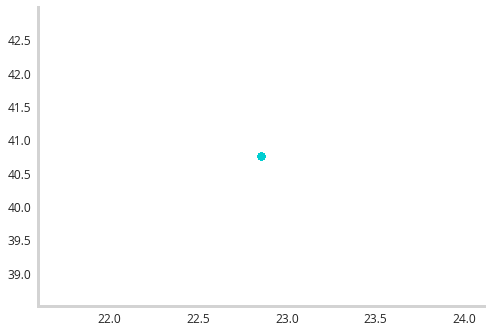

In [134]:
fig,ax=plt.subplots()
ax.scatter(stddev,mean)

# boston housing dataset with tf probability

In [7]:
from sklearn.datasets import load_boston
X_boston, y_boston = load_boston(return_X_y=True)

In [40]:
tfd = tfp.distributions

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1 + 1),
  tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.05 * t[..., 1:]))),
])
negloglik = lambda y, p_y: -p_y.log_prob(y)
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05), loss=negloglik)

model.fit(x_values, y_values, epochs=500, verbose=False)

NameError: name 'np' is not defined

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
distribution_lambda (Distrib multiple                  0         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [58]:
def build_multiple_regression_NN(X,y):
    X_shape=X.shape

    model = Sequential()
    
    model.add(Dense(128, input_shape=(X_shape[1],), activation='relu', name='dense_1'))
    
    model.add(Dense(64, activation='relu', name='dense_2'))
    model.add(Dense(2, input_dim=2,name='dense_3'))


    model.add(tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1],
                           scale=1e-3 + tf.math.softplus(0.05 * t[..., 1:]))),)


    negloglik = lambda y, p_y: -p_y.log_prob(y)
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05),loss=negloglik)

    return model

In [59]:
boston_housing_model=build_multiple_regression_NN(X_boston, y_boston)

In [60]:
model.fit(X_boston, y_boston, epochs=500, verbose=True)

Epoch 1/500
16/16 [==============================] - 0s 1ms/step - loss: 5.4610 - mae: 1.7653
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 4.7330 - mae: 1.6055
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 4.2689 - mae: 1.5617
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 4.8066 - mae: 1.6522
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 5.5185 - mae: 1.7750
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 4.8083 - mae: 1.6531
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 5.3064 - mae: 1.7693
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 5.2051 - mae: 1.7038
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 4.6136 - mae: 1.6482
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 4.9165 - mae: 1.7439
Epoch 11/500
16/16 [==============================] - 0s 2m

16/16 [==============================] - 0s 1ms/step - loss: 4.3411 - mae: 1.6364
Epoch 88/500
16/16 [==============================] - 0s 1ms/step - loss: 5.7784 - mae: 1.9017
Epoch 89/500
16/16 [==============================] - 0s 1ms/step - loss: 4.5518 - mae: 1.6065
Epoch 90/500
16/16 [==============================] - 0s 1ms/step - loss: 3.9658 - mae: 1.5025
Epoch 91/500
16/16 [==============================] - 0s 1ms/step - loss: 4.0575 - mae: 1.5304
Epoch 92/500
16/16 [==============================] - 0s 1ms/step - loss: 4.5963 - mae: 1.6404
Epoch 93/500
16/16 [==============================] - 0s 1ms/step - loss: 4.9360 - mae: 1.6674
Epoch 94/500
16/16 [==============================] - 0s 1ms/step - loss: 5.0599 - mae: 1.6892
Epoch 95/500
16/16 [==============================] - 0s 1ms/step - loss: 4.8891 - mae: 1.7012
Epoch 96/500
16/16 [==============================] - 0s 1ms/step - loss: 3.8579 - mae: 1.4848
Epoch 97/500
16/16 [==============================] - 0s 1ms/st

16/16 [==============================] - 0s 1ms/step - loss: 3.6447 - mae: 1.4481
Epoch 173/500
16/16 [==============================] - 0s 1ms/step - loss: 3.2328 - mae: 1.3503
Epoch 174/500
16/16 [==============================] - 0s 1ms/step - loss: 3.3547 - mae: 1.3509
Epoch 175/500
16/16 [==============================] - 0s 1ms/step - loss: 3.6517 - mae: 1.4449
Epoch 176/500
16/16 [==============================] - 0s 1ms/step - loss: 3.2088 - mae: 1.3461
Epoch 177/500
16/16 [==============================] - 0s 1ms/step - loss: 4.3881 - mae: 1.5980
Epoch 178/500
16/16 [==============================] - 0s 1ms/step - loss: 5.1157 - mae: 1.7749
Epoch 179/500
16/16 [==============================] - 0s 1ms/step - loss: 3.8773 - mae: 1.5129
Epoch 180/500
16/16 [==============================] - 0s 1ms/step - loss: 3.4657 - mae: 1.3652
Epoch 181/500
16/16 [==============================] - 0s 1ms/step - loss: 3.1241 - mae: 1.3141
Epoch 182/500
16/16 [==============================] -

16/16 [==============================] - 0s 1ms/step - loss: 3.5185 - mae: 1.3947
Epoch 258/500
16/16 [==============================] - 0s 1ms/step - loss: 3.0527 - mae: 1.3431
Epoch 259/500
16/16 [==============================] - 0s 1ms/step - loss: 3.4680 - mae: 1.3842
Epoch 260/500
16/16 [==============================] - 0s 1ms/step - loss: 4.0923 - mae: 1.5623
Epoch 261/500
16/16 [==============================] - 0s 1ms/step - loss: 4.0853 - mae: 1.5443
Epoch 262/500
16/16 [==============================] - 0s 1ms/step - loss: 3.5517 - mae: 1.4348
Epoch 263/500
16/16 [==============================] - 0s 1ms/step - loss: 3.4079 - mae: 1.3843
Epoch 264/500
16/16 [==============================] - 0s 1ms/step - loss: 3.6908 - mae: 1.4251
Epoch 265/500
16/16 [==============================] - 0s 1ms/step - loss: 3.4668 - mae: 1.4175
Epoch 266/500
16/16 [==============================] - 0s 1ms/step - loss: 3.2892 - mae: 1.3655
Epoch 267/500
16/16 [==============================] -

16/16 [==============================] - 0s 1ms/step - loss: 4.0020 - mae: 1.5146
Epoch 343/500
16/16 [==============================] - 0s 1ms/step - loss: 3.9921 - mae: 1.4998
Epoch 344/500
16/16 [==============================] - 0s 1ms/step - loss: 3.2039 - mae: 1.3475
Epoch 345/500
16/16 [==============================] - 0s 1ms/step - loss: 3.7174 - mae: 1.4636
Epoch 346/500
16/16 [==============================] - 0s 1ms/step - loss: 3.3883 - mae: 1.4048
Epoch 347/500
16/16 [==============================] - 0s 1ms/step - loss: 4.3635 - mae: 1.6254
Epoch 348/500
16/16 [==============================] - 0s 1ms/step - loss: 3.2718 - mae: 1.3933
Epoch 349/500
16/16 [==============================] - 0s 1ms/step - loss: 3.1219 - mae: 1.3509
Epoch 350/500
16/16 [==============================] - 0s 1ms/step - loss: 3.1124 - mae: 1.3492
Epoch 351/500
16/16 [==============================] - 0s 1ms/step - loss: 4.9065 - mae: 1.7679
Epoch 352/500
16/16 [==============================] -

16/16 [==============================] - 0s 1ms/step - loss: 3.4862 - mae: 1.4031
Epoch 428/500
16/16 [==============================] - 0s 1ms/step - loss: 3.3974 - mae: 1.3817
Epoch 429/500
16/16 [==============================] - 0s 1ms/step - loss: 3.1811 - mae: 1.3277
Epoch 430/500
16/16 [==============================] - 0s 1ms/step - loss: 4.2739 - mae: 1.5878
Epoch 431/500
16/16 [==============================] - 0s 1ms/step - loss: 2.8466 - mae: 1.2715
Epoch 432/500
16/16 [==============================] - 0s 1ms/step - loss: 2.8093 - mae: 1.2505
Epoch 433/500
16/16 [==============================] - 0s 1ms/step - loss: 3.0868 - mae: 1.3247
Epoch 434/500
16/16 [==============================] - 0s 1ms/step - loss: 2.9741 - mae: 1.2962
Epoch 435/500
16/16 [==============================] - 0s 1ms/step - loss: 3.2458 - mae: 1.3603
Epoch 436/500
16/16 [==============================] - 0s 1ms/step - loss: 2.9290 - mae: 1.2748
Epoch 437/500
16/16 [==============================] -

In [61]:
yhat = model(X_boston)


In [48]:
model = Sequential()
model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_output (Dense)         (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [49]:
history = model.fit(X_boston, y_boston, epochs=100, validation_split=0.05)

Epoch 1/100
15/15 [==============================] - 1s 17ms/step - loss: 1746.3965 - mae: 34.7278 - val_loss: 89.8029 - val_mae: 8.6587
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 239.7693 - mae: 12.3831 - val_loss: 174.6978 - val_mae: 12.4395
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 98.5610 - mae: 7.9066 - val_loss: 18.8907 - val_mae: 3.1229
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 66.5413 - mae: 5.9989 - val_loss: 20.5671 - val_mae: 3.6536
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 62.5238 - mae: 5.6798 - val_loss: 18.9737 - val_mae: 3.3426
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 45.5803 - mae: 4.7848 - val_loss: 28.1902 - val_mae: 3.9874
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 59.6373 - mae: 5.6669 - val_loss: 20.7069 - val_mae: 3.4517
Epoch 8/100
15/15 [==============================] - 0s 4ms/s

15/15 [==============================] - 0s 3ms/step - loss: 32.7725 - mae: 4.0342 - val_loss: 53.1061 - val_mae: 5.7044
Epoch 63/100
15/15 [==============================] - 0s 3ms/step - loss: 28.8452 - mae: 3.9625 - val_loss: 28.5949 - val_mae: 4.0774
Epoch 64/100
15/15 [==============================] - 0s 3ms/step - loss: 27.6957 - mae: 3.7887 - val_loss: 39.3666 - val_mae: 4.7246
Epoch 65/100
15/15 [==============================] - 0s 3ms/step - loss: 26.6544 - mae: 3.7010 - val_loss: 41.4619 - val_mae: 4.7793
Epoch 66/100
15/15 [==============================] - 0s 3ms/step - loss: 30.1579 - mae: 4.1676 - val_loss: 28.4250 - val_mae: 4.1042
Epoch 67/100
15/15 [==============================] - 0s 3ms/step - loss: 28.1305 - mae: 3.9367 - val_loss: 37.0943 - val_mae: 4.6024
Epoch 68/100
15/15 [==============================] - 0s 3ms/step - loss: 26.5900 - mae: 3.5718 - val_loss: 28.7950 - val_mae: 4.1672
Epoch 69/100
15/15 [==============================] - 0s 3ms/step - loss: 2